In [1]:
import sys
import re
import numpy as np
import pandas as pd
from Bio import SeqIO
from Bio import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils import GC
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import operator
from tqdm.notebook import tqdm
from functions import *
import random
from Bio import Restriction
import copy
from itertools import combinations
from itertools import permutations
from itertools import product
import urllib.request as urllib2
from dna_features_viewer import BiopythonTranslator
from Bio.SeqFeature import SeqFeature, FeatureLocation

In [5]:
#Create a codon table for e.coli:
all_name_cds_ecoli = {str(record.description).split("gene=")[1].split("]",1)[0]:str(record.seq)
                      for record in SeqIO.parse("../ref_files_m13/GCF_000005845.2_ASM584v2_cds_from_genomic.fna", "fasta")}
codon_table_ecoli = create_codon_table(list(all_name_cds_ecoli.values()), 11)

# Make a reversed dict codon usage of whole genome
rev_ecoli_codon_usage = reverse_codon_table(codon_table_ecoli)

je suis la liste d'avant:  [8, 12, 20, 39, 40, 41, 42, 58, 66, 73, 74, 79, 91, 100, 104, 109, 110]
[(8, 8), (12, 12), (20, 20), (39, 42), (58, 58), (66, 66), (73, 74), (79, 79), (91, 91), (100, 100), (104, 104), (109, 110)]


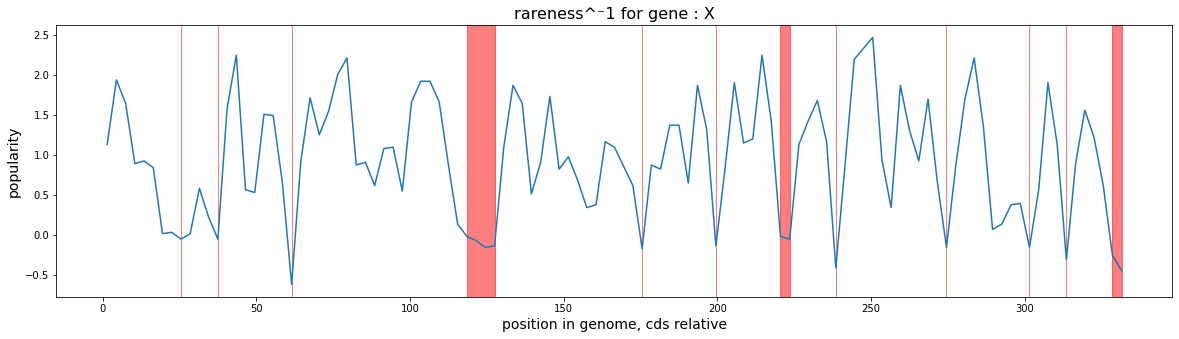

je suis la liste d'avant:  [9, 10, 26, 32, 44, 52, 53, 56, 59, 60, 63, 64, 79, 80, 81, 86]
[(9, 10), (26, 26), (32, 32), (44, 44), (52, 53), (56, 56), (59, 60), (63, 64), (79, 81), (86, 86)]


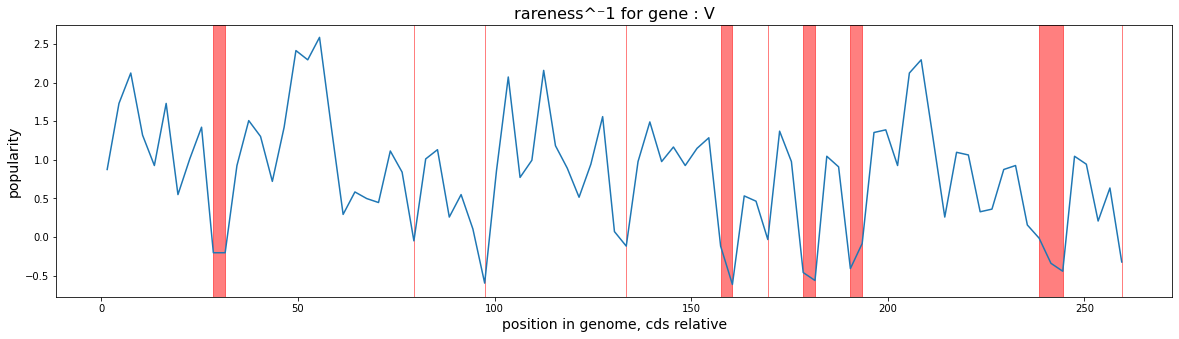

je suis la liste d'avant:  [2, 3, 7, 11, 12, 13, 14, 15, 16, 21, 22, 23, 26, 31, 32]
[(2, 3), (7, 7), (11, 16), (21, 23), (26, 26), (31, 32)]


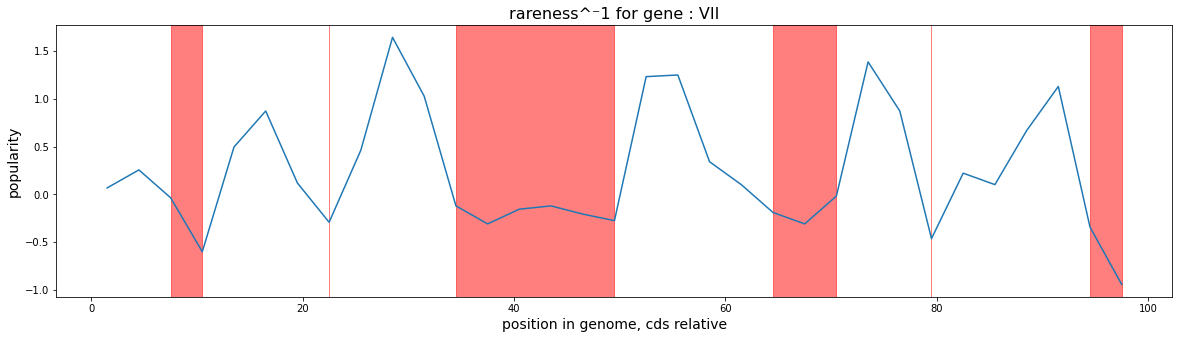

je suis la liste d'avant:  [0, 14, 15, 17, 24, 31]
[(0, 0), (14, 15), (17, 17), (24, 24), (31, 31)]


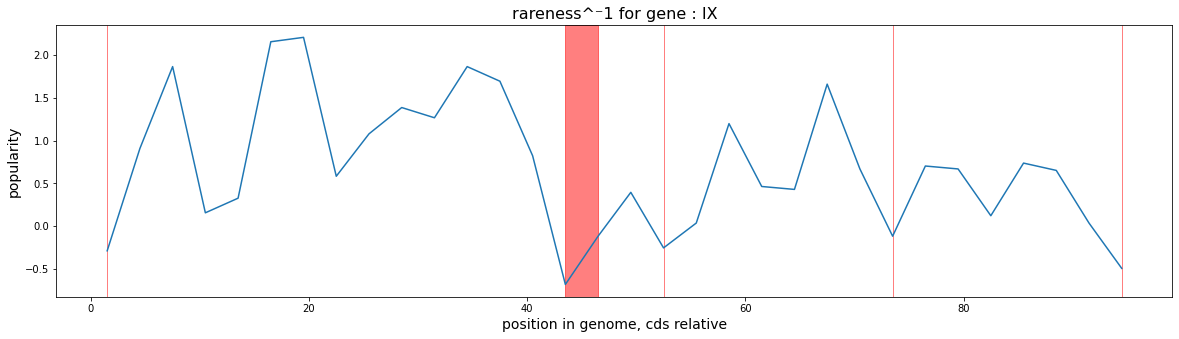

je suis la liste d'avant:  [5, 10, 14, 17, 18, 28, 31, 34, 35, 36, 37, 38, 39, 40, 41, 47, 48, 49, 61, 67, 68, 71, 72]
[(5, 5), (10, 10), (14, 14), (17, 18), (28, 28), (31, 31), (34, 41), (47, 49), (61, 61), (67, 68), (71, 72)]


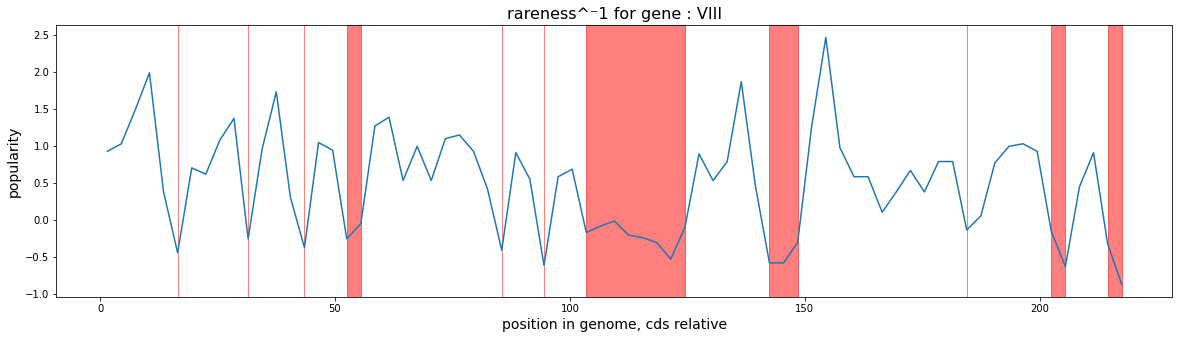

je suis la liste d'avant:  [16, 22, 23, 28, 29, 30, 36, 37, 46, 53, 54, 58, 69, 70, 73, 78, 108, 112, 120, 123, 133, 134, 157, 158, 161, 162, 163, 169, 177, 183, 184, 192, 197, 198, 202, 203, 204, 207, 218, 223, 226, 262, 263, 281, 285, 288, 289, 294, 295, 296, 297, 345, 364, 367, 370, 371, 388, 391, 405, 416, 417, 418]
[(16, 16), (22, 23), (28, 30), (36, 37), (46, 46), (53, 54), (58, 58), (69, 70), (73, 73), (78, 78), (108, 108), (112, 112), (120, 120), (123, 123), (133, 134), (157, 158), (161, 163), (169, 169), (177, 177), (183, 184), (192, 192), (197, 198), (202, 204), (207, 207), (218, 218), (223, 223), (226, 226), (262, 263), (281, 281), (285, 285), (288, 289), (294, 297), (345, 345), (364, 364), (367, 367), (370, 371), (388, 388), (391, 391), (405, 405), (416, 418)]


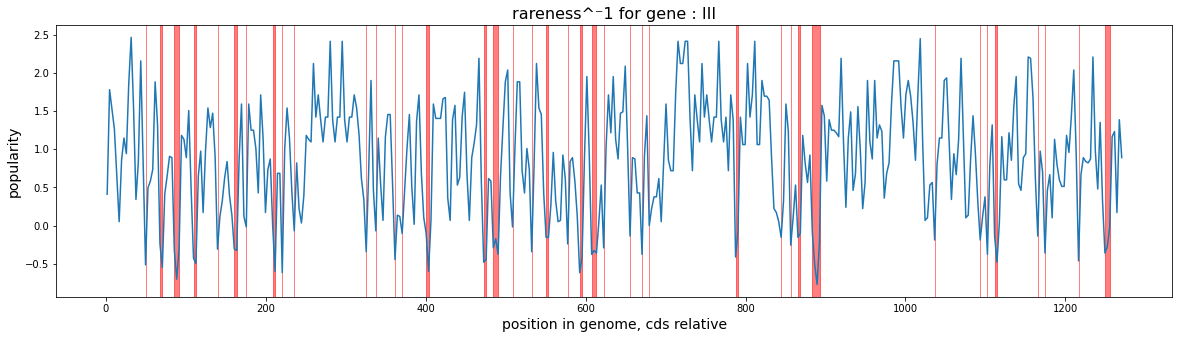

je suis la liste d'avant:  [0, 10, 12, 17, 20, 34, 40, 48, 50, 53, 76, 80, 81, 82]
[(0, 0), (10, 10), (12, 12), (17, 17), (20, 20), (34, 34), (40, 40), (48, 48), (50, 50), (53, 53), (76, 76), (80, 82)]


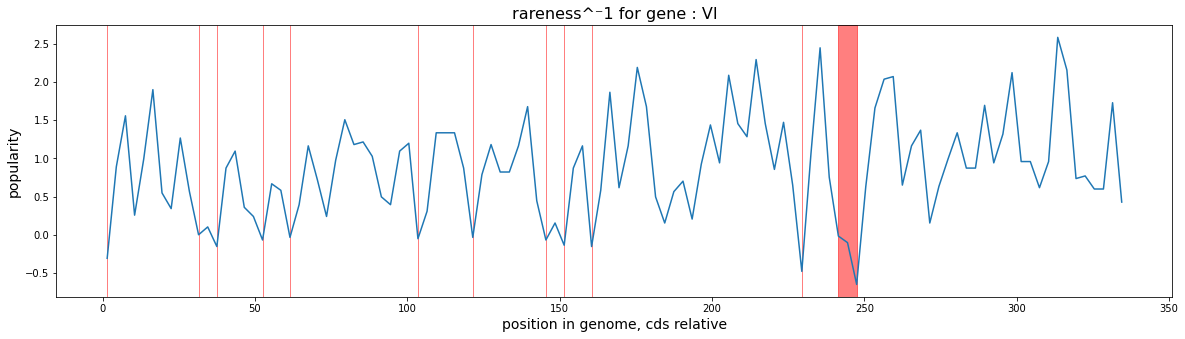

je suis la liste d'avant:  [12, 13, 14, 28, 31, 38, 40, 41, 42, 43, 44, 45, 46, 47, 51, 55, 56, 57, 70, 75, 88, 95, 102, 103, 104, 111, 117, 133, 134, 140, 145, 147, 148, 149, 165, 186, 191, 201, 222, 226, 256, 269, 270, 273, 274, 279, 299, 309, 315, 324, 325]
[(12, 14), (28, 28), (31, 31), (38, 38), (40, 47), (51, 51), (55, 57), (70, 70), (75, 75), (88, 88), (95, 95), (102, 104), (111, 111), (117, 117), (133, 134), (140, 140), (145, 145), (147, 149), (165, 165), (186, 186), (191, 191), (201, 201), (222, 222), (226, 226), (256, 256), (269, 270), (273, 274), (279, 279), (299, 299), (309, 309), (315, 315), (324, 325)]


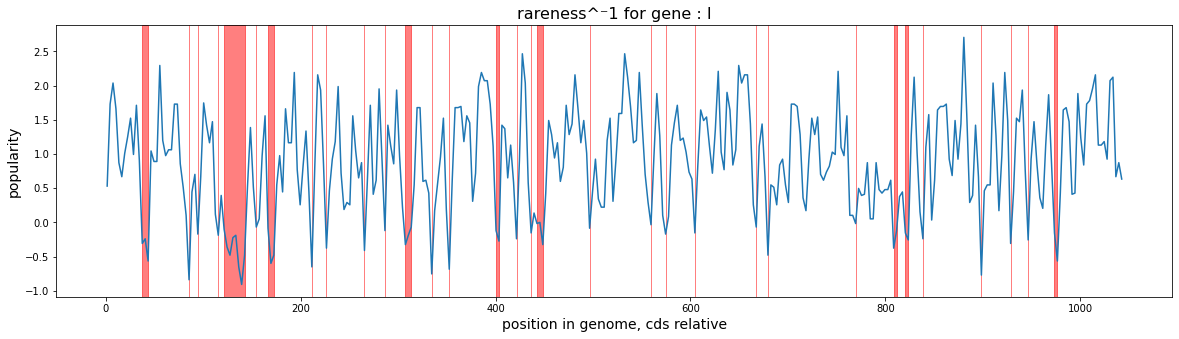

je suis la liste d'avant:  [16, 29, 30, 33, 34, 39, 59, 69, 75, 84, 85]
[(16, 16), (29, 30), (33, 34), (39, 39), (59, 59), (69, 69), (75, 75), (84, 85)]


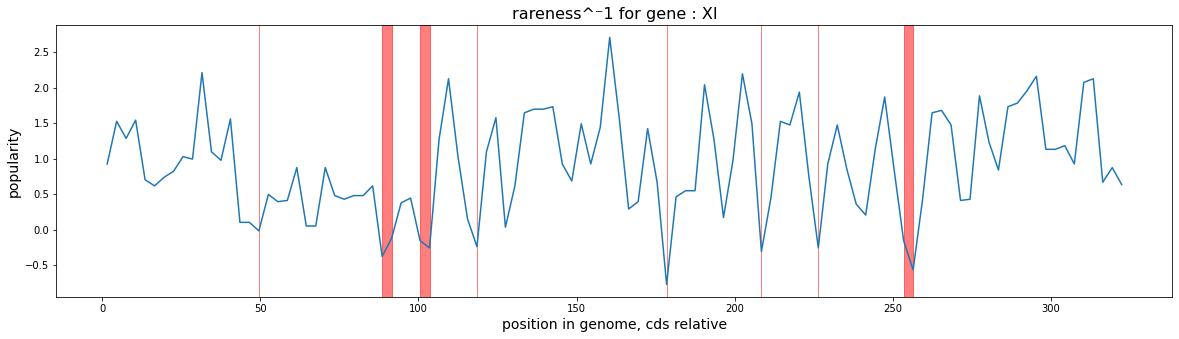

je suis la liste d'avant:  [10, 11, 28, 30, 67, 95, 104, 105, 125, 140, 145, 148, 192, 197, 202, 232, 233, 234, 244, 254, 255, 258, 264, 265, 268, 271, 272, 275, 276, 296, 309, 320, 337, 338, 339, 342, 343, 349, 356, 357, 361, 365, 368, 388, 389, 390, 399, 402, 403, 408, 410, 411, 414, 415, 416, 419, 420, 421, 422, 423, 424, 425]
[(10, 11), (28, 28), (30, 30), (67, 67), (95, 95), (104, 105), (125, 125), (140, 140), (145, 145), (148, 148), (192, 192), (197, 197), (202, 202), (232, 234), (244, 244), (254, 255), (258, 258), (264, 265), (268, 268), (271, 272), (275, 276), (296, 296), (309, 309), (320, 320), (337, 339), (342, 343), (349, 349), (356, 357), (361, 361), (365, 365), (368, 368), (388, 390), (399, 399), (402, 403), (408, 408), (410, 411), (414, 416), (419, 425)]


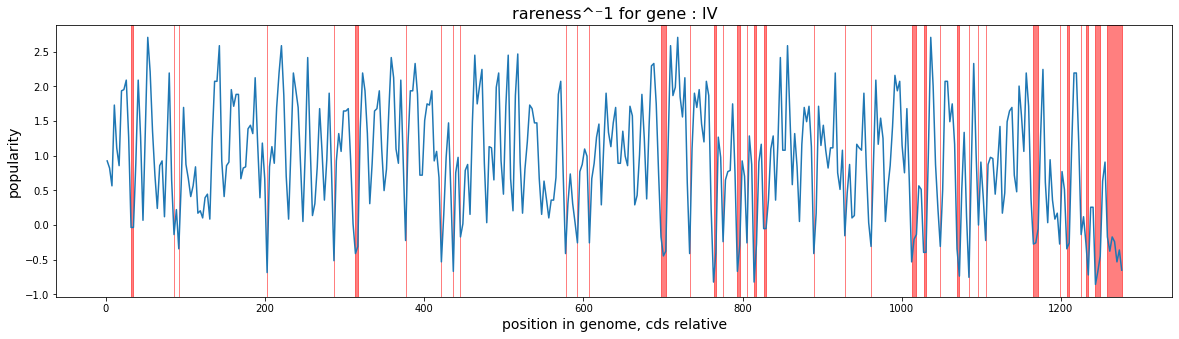

je suis la liste d'avant:  [3, 9, 10, 16, 17, 18, 19, 23, 24, 25, 30, 35, 36, 44, 56, 61, 67, 68, 69, 70, 86, 89, 90, 94, 106, 125, 126, 139, 143, 148, 149, 160, 161, 162, 174, 175, 178, 183, 188, 189, 190, 201, 202, 203, 212, 213, 217, 227, 232, 233, 234, 249, 255, 256, 264, 265, 273, 277, 283, 285, 289, 295, 307, 311, 319, 338, 339, 340, 341, 357, 365, 372, 373, 378, 390, 399, 403, 408, 409]
[(3, 3), (9, 10), (16, 19), (23, 25), (30, 30), (35, 36), (44, 44), (56, 56), (61, 61), (67, 70), (86, 86), (89, 90), (94, 94), (106, 106), (125, 126), (139, 139), (143, 143), (148, 149), (160, 162), (174, 175), (178, 178), (183, 183), (188, 190), (201, 203), (212, 213), (217, 217), (227, 227), (232, 234), (249, 249), (255, 256), (264, 265), (273, 273), (277, 277), (283, 283), (285, 285), (289, 289), (295, 295), (307, 307), (311, 311), (319, 319), (338, 341), (357, 357), (365, 365), (372, 373), (378, 378), (390, 390), (399, 399), (403, 403), (408, 409)]


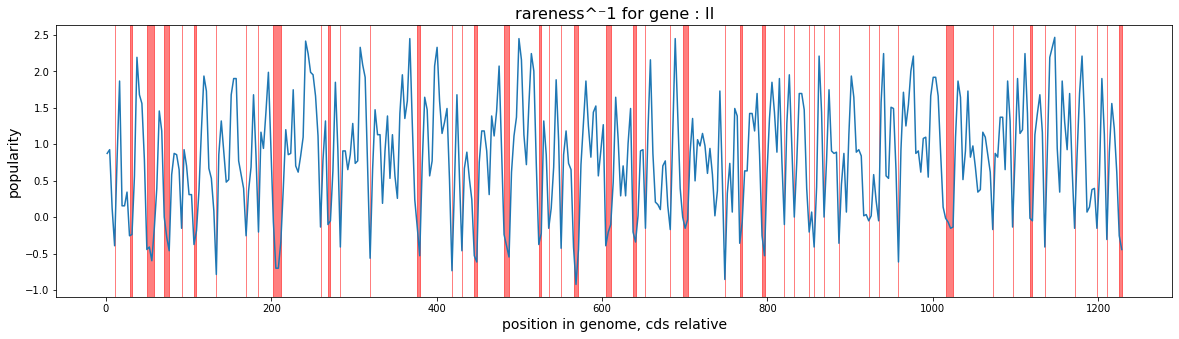

In [2]:
#after some discussions with sebastien, we came to the conclusion we must check some littles things  before going foward with the initial plan of recoding. 
#1) make a graph of rare codons usage through the m13 genome (gene per gene): first, using the overall m13 genome as reference.
#The question is: Is there any cluster of popular codon (or rare codon) taking into account the codon table of m13.
#il y a comme deux concepts ici: 1,à quel point c'est surprenant avoir un codon qui encode pour un aa quelconque à une position donnée:
#2, à quel point c'est surprenant avoir cet aa qui est encodé par ce codon.        

def plot_rareness(filename,step,bin_len,codon_table,locations_in_kevin_m13):
    record = SeqIO.read(filename, "genbank")
    lg_dna = int(len(record.seq))
    nb_of_aa = sum(infos_aa["count"] for infos_aa in codon_table.values())   #total number of codons encoding aa in m13 genome


    #append codon ratio (usage for a single aa/total number of aa)
    for codon, info in codon_table.items():
        info["ratio"] =  info["count"]/nb_of_aa
        
    # find the mean and the sd of every ratio.
    mean_ratio = statistics.mean([info["ratio"] for codon, info in codon_table.items()])
    sd_ratio = statistics.stdev([info["ratio"] for codon, info in codon_table.items()])

    #for each cds, create a dict : {coordinates_of_a_gene:{pos0:popularity,pos1:popularity,pos2:popularity...},coordinate_of_a_gene:{pos1:popularity...}...}
    #in locations_in_kevin_m13, dict is 'ordered' by key value
    gene_pos_rarescore = {}
    for coor,cds in locations_in_kevin_m13.items():
        gene_pos_rarescore[coor_genename[coor]] = {}
        for idx in range(int(len(cds)/3)):
            codon = cds[idx*3:idx*3+3]
            #for each position, (ratio-mean(all_ratios))/sd(all_ratios)
            gene_pos_rarescore[coor_genename[coor]][idx*3] = (codon_table[codon]["ratio"]-mean_ratio)/sd_ratio
            # print(coor_genename[coor],idx*3)
            # print(codon_table[codon]["ratio"])
            # print("mean_ratio: ",mean_ratio)
            # print("sd_ratio: ",sd_ratio)
            # print("score: ",(codon_table[codon]["ratio"]-mean_ratio)/sd_ratio)
            
            #relative coordinates for each gene, not dealing with the overlapping gene with absolute coordinate 0! (overkill complicated gene)
            
   
    codon_bin_len=bin_len
    step_len=step
    for genename, pos_score in gene_pos_rarescore.items():
        plt.rcParams["figure.figsize"] = (20,5)
        lists = sorted(pos_score.items()) # sorted by key, return a list of tuples
        x, y = zip(*lists) # unpack a list of pairs into two tuples
        xaxis = []
        yaxis = []
        for pos in range(0,len(x),step_len):
            if pos+codon_bin_len < len(x): #if equals, number of codon in frame with bin_len and step (sliding window):
                xaxis.append((x[pos]+x[pos+codon_bin_len-1])/2)
                yaxis.append(statistics.mean(y[pos:(pos+codon_bin_len)]))
            else:
                xaxis.append((x[-codon_bin_len]+x[-1])/2)
                yaxis.append(statistics.mean(y[-codon_bin_len:]))
                #to graphically see a last point, add the last element of the list with the same value of the bin before.
                #however, this bin doesnt make biological sense.
                break

        #find stastistical enriched region with rare codon:
        x_significant_pos = []
        for i,yvalue in enumerate(yaxis):
            if yvalue < mean_ratio-sd_ratio: # significant value of at least 1 bin_len of a value lower than mean - sd 
                x_significant_pos.append(i)
        print("je suis la liste d'avant: ", x_significant_pos)
        x_significant_range = []
        if x_significant_pos:
            pos_start = -1 
            for i,xpos in enumerate(x_significant_pos):
                if i+1 < len(x_significant_pos):
                    append = False
                    if pos_start == -1:
                        pos_start = x_significant_pos[i]
                        pos_end = x_significant_pos[i]
                    if x_significant_pos[i]+1 == x_significant_pos[i+1]:
                        pos_end = x_significant_pos[i]+1
                        if i+1 == len(x_significant_pos)-1: #last case scenario.
                            x_significant_range.append((pos_start,pos_end))
                            append = False
                    else:
                        append = True
                        x_significant_range.append((pos_start,pos_end))
                        pos_start = -1

            if append:
                x_significant_range.append((x_significant_pos[-1],x_significant_pos[-1]))
        print(x_significant_range)
        if x_significant_pos:
            fig, ax = plt.subplots()
            for coor in x_significant_range:
                ax.axvspan(xaxis[coor[0]],xaxis[coor[1]], alpha=0.5, color='red')
        plt.title("rareness^⁻1 for gene : "+str(genename),fontsize=16)
        plt.xlabel('position in genome, cds relative', fontsize=14)
        plt.ylabel('popularity', fontsize=14)
        plt.plot(xaxis, yaxis)
        plt.show()
            
#find gene position in genbank:            
path_to_all_cdss_m13 = "../ref_files_m13/m13mp18-Kan.ape"
locations_in_kevin_m13 = {}
for gb_record in SeqIO.parse(open(path_to_all_cdss_m13, "r"), "genbank"):
    dna_seq = str(gb_record.seq)
lg_dna = len(dna_seq)
coor_genename = {}
for record in SeqIO.parse(path_to_all_cdss_m13, "genbank"):
    for feat in record.features:
        if 'gene' in feat.qualifiers and not "p" in feat.qualifiers["locus_tag"][0] :
            if not "join" in str(feat.location):
                coor = str(feat.location)[1:-4].split(":")
                coor_genename[(int(coor[0]),int(coor[1]))] = str(feat.qualifiers["locus_tag"][0])
                locations_in_kevin_m13[(int(coor[0]),int(coor[1]))] = dna_seq[int(coor[0]):int(coor[1])]
            else:
                coor = []
                for i in str(feat.location).split(","):
                    for j in i.split(":"):
                        j_corrected = re.sub("[^0-9]","",j)
                        coor.append(j_corrected)
                coor_genename[int(coor[0]),int(coor[-1])] = str(feat.qualifiers["locus_tag"][0])
                locations_in_kevin_m13[int(coor[0]),int(coor[-1])] = dna_seq[int(coor[0]):]+dna_seq[:int(coor[-1])]
                    
locations_in_kevin_m13=dict(sorted(locations_in_kevin_m13.items()))  #order dict by key value
codon_table_m13_kevun = create_codon_table(locations_in_kevin_m13.values(),11)

plot_rareness("../ref_files_m13/m13mp18-Kan.ape",1,2,codon_table_m13_kevun,locations_in_kevin_m13)

je suis la liste d'avant:  [6, 7, 8, 17, 20, 21, 25, 26, 31, 47, 49, 50, 53, 55, 56, 60, 61, 62, 67, 72, 76, 77, 79, 80, 94, 95, 96, 98, 99, 101, 104, 105, 106, 110]
[(6, 8), (17, 17), (20, 21), (25, 26), (31, 31), (47, 47), (49, 50), (53, 53), (55, 56), (60, 62), (67, 67), (72, 72), (76, 77), (79, 80), (94, 96), (98, 99), (101, 101), (104, 106), (110, 110)]


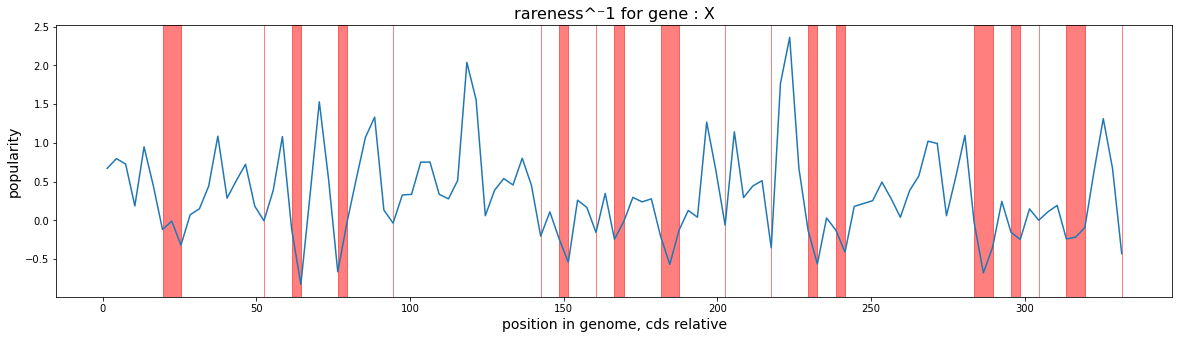

je suis la liste d'avant:  [7, 8, 12, 13, 14, 15, 18, 19, 23, 24, 25, 31, 32, 33, 42, 43, 44, 47, 62, 65, 66, 74, 82, 85, 86]
[(7, 8), (12, 15), (18, 19), (23, 25), (31, 33), (42, 44), (47, 47), (62, 62), (65, 66), (74, 74), (82, 82), (85, 86)]


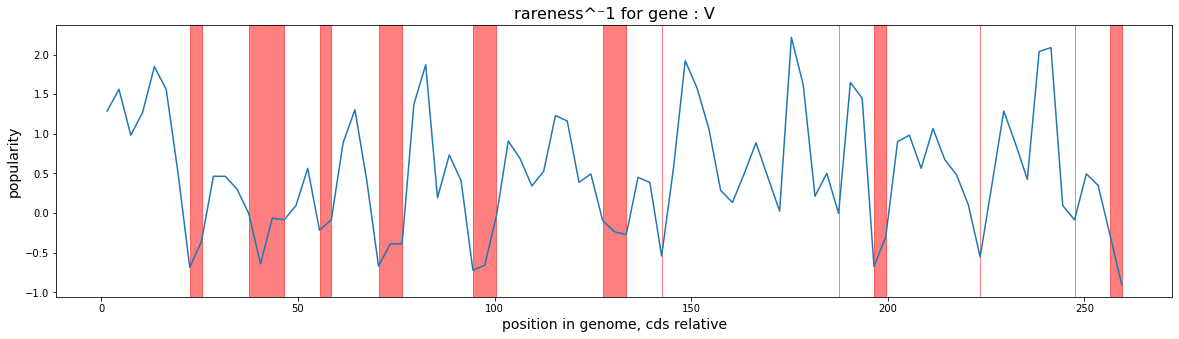

je suis la liste d'avant:  [7, 14, 17, 18, 19, 20, 21, 25, 26, 28, 31, 32]
[(7, 7), (14, 14), (17, 21), (25, 26), (28, 28), (31, 32)]


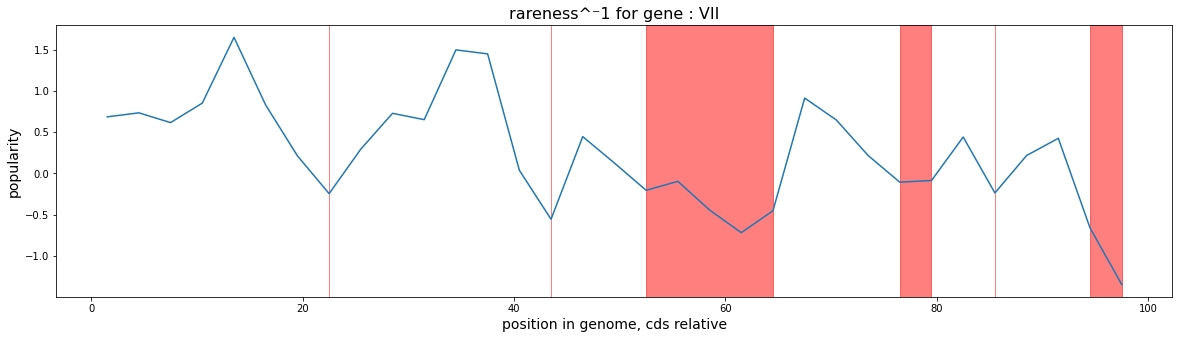

je suis la liste d'avant:  [1, 5, 6, 9, 14, 15, 17, 21, 29, 30, 31]
[(1, 1), (5, 6), (9, 9), (14, 15), (17, 17), (21, 21), (29, 31)]


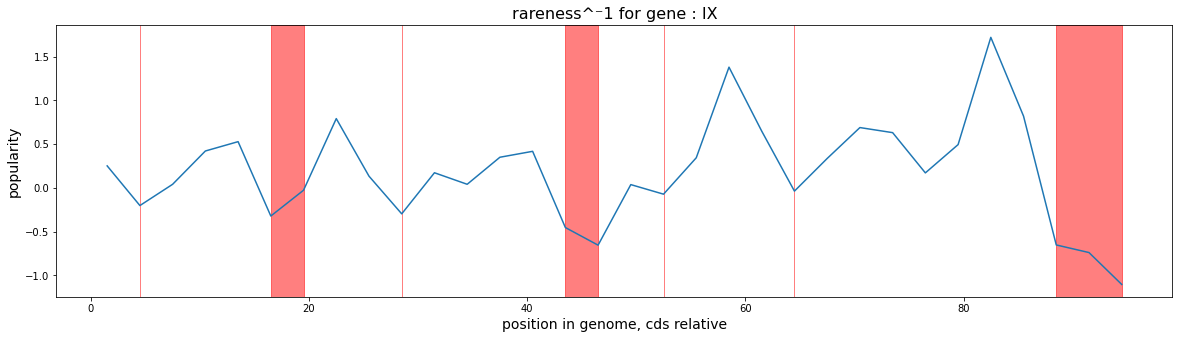

je suis la liste d'avant:  [2, 3, 4, 5, 9, 15, 20, 22, 28, 34, 57, 72]
[(2, 5), (9, 9), (15, 15), (20, 20), (22, 22), (28, 28), (34, 34), (57, 57), (72, 72)]


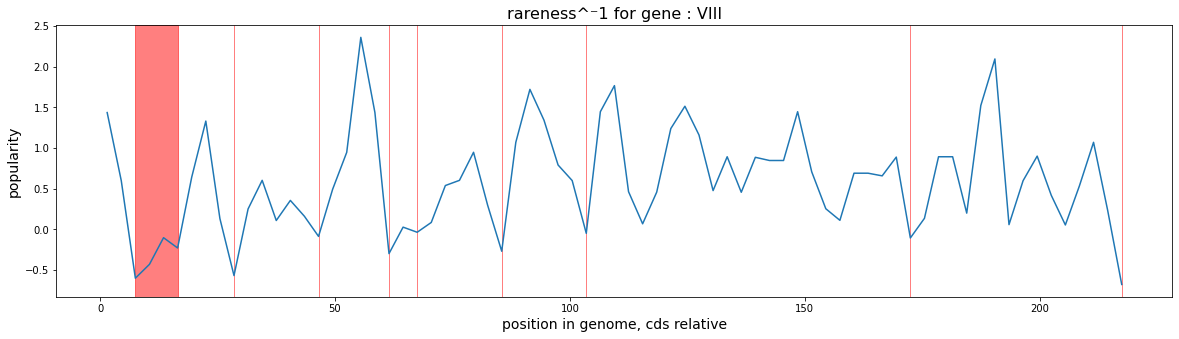

je suis la liste d'avant:  [3, 4, 8, 11, 12, 14, 15, 16, 17, 20, 23, 24, 28, 29, 32, 33, 34, 35, 37, 43, 47, 57, 60, 61, 62, 63, 70, 73, 75, 78, 79, 89, 94, 99, 106, 107, 108, 112, 117, 118, 121, 122, 123, 126, 128, 131, 134, 135, 137, 138, 139, 140, 141, 142, 144, 147, 148, 149, 150, 156, 157, 158, 159, 160, 161, 163, 165, 166, 168, 171, 172, 173, 176, 177, 178, 181, 182, 185, 186, 187, 188, 189, 196, 197, 202, 203, 204, 205, 207, 208, 217, 223, 224, 225, 228, 229, 230, 231, 246, 251, 256, 261, 262, 284, 285, 286, 299, 307, 308, 309, 314, 323, 326, 332, 339, 340, 341, 344, 345, 351, 352, 353, 361, 362, 363, 364, 365, 366, 367, 368, 371, 372, 373, 381, 384, 388, 391, 393, 401, 402, 409, 411, 412, 416, 420, 421, 422, 423]
[(3, 4), (8, 8), (11, 12), (14, 17), (20, 20), (23, 24), (28, 29), (32, 35), (37, 37), (43, 43), (47, 47), (57, 57), (60, 63), (70, 70), (73, 73), (75, 75), (78, 79), (89, 89), (94, 94), (99, 99), (106, 108), (112, 112), (117, 118), (121, 123), (126, 126), (128, 128), 

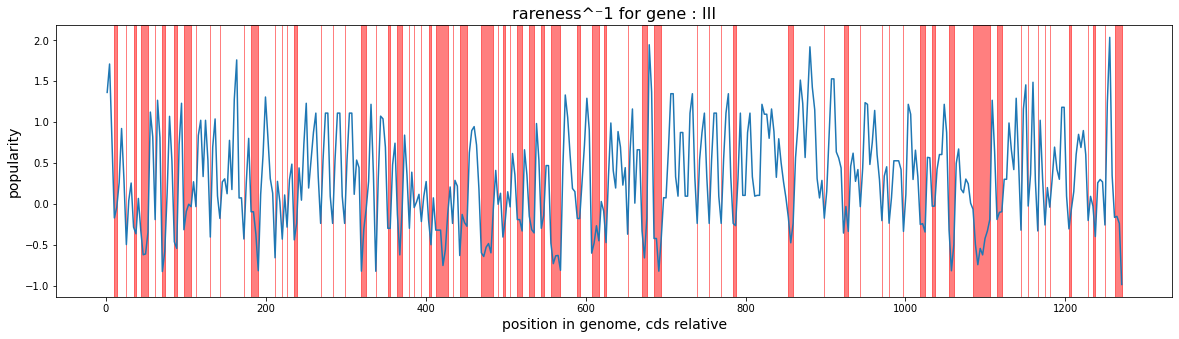

je suis la liste d'avant:  [1, 2, 3, 8, 9, 12, 15, 18, 19, 20, 25, 26, 34, 35, 40, 43, 44, 48, 50, 56, 57, 61, 62, 63, 64, 65, 66, 78, 81, 82, 83, 88, 89, 90, 91, 92, 104, 105, 106]
[(1, 3), (8, 9), (12, 12), (15, 15), (18, 20), (25, 26), (34, 35), (40, 40), (43, 44), (48, 48), (50, 50), (56, 57), (61, 66), (78, 78), (81, 83), (88, 92), (104, 106)]


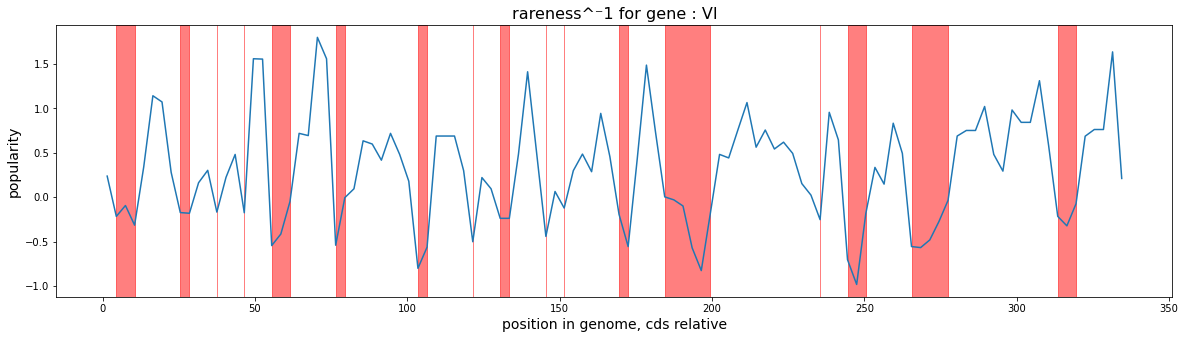

je suis la liste d'avant:  [5, 11, 12, 13, 14, 15, 26, 27, 28, 31, 32, 33, 34, 37, 38, 39, 44, 45, 46, 47, 51, 52, 54, 55, 56, 57, 60, 61, 62, 63, 66, 67, 75, 83, 84, 85, 88, 89, 91, 96, 97, 103, 110, 111, 112, 116, 117, 123, 127, 135, 136, 138, 141, 144, 145, 149, 152, 153, 154, 158, 159, 160, 161, 173, 174, 183, 184, 185, 186, 187, 188, 192, 193, 194, 197, 198, 199, 209, 210, 211, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 233, 234, 235, 242, 245, 246, 250, 251, 253, 254, 255, 259, 261, 262, 264, 265, 266, 267, 268, 269, 271, 272, 278, 279, 280, 289, 292, 293, 297, 298, 299, 305, 308, 309, 320, 323, 324, 325, 326, 330, 331, 332, 333, 339, 340, 346, 347]
[(5, 5), (11, 15), (26, 28), (31, 34), (37, 39), (44, 47), (51, 52), (54, 57), (60, 63), (66, 67), (75, 75), (83, 85), (88, 89), (91, 91), (96, 97), (103, 103), (110, 112), (116, 117), (123, 123), (127, 127), (135, 136), (138, 138), (141, 141), (144, 145), (149, 149), (152, 154), (158, 161), (173, 174), (183, 188), (192, 1

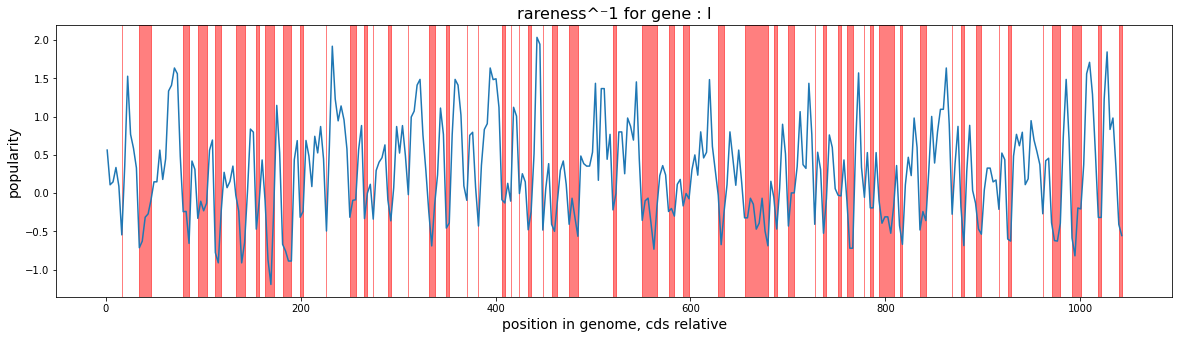

je suis la liste d'avant:  [2, 5, 6, 10, 11, 13, 14, 15, 19, 21, 22, 24, 25, 26, 27, 28, 29, 31, 32, 38, 39, 40, 49, 52, 53, 57, 58, 59, 65, 68, 69, 80, 83, 84, 85, 86, 90, 91, 92, 93, 99, 100, 106, 107]
[(2, 2), (5, 6), (10, 11), (13, 15), (19, 19), (21, 22), (24, 29), (31, 32), (38, 40), (49, 49), (52, 53), (57, 59), (65, 65), (68, 69), (80, 80), (83, 86), (90, 93), (99, 100), (106, 107)]


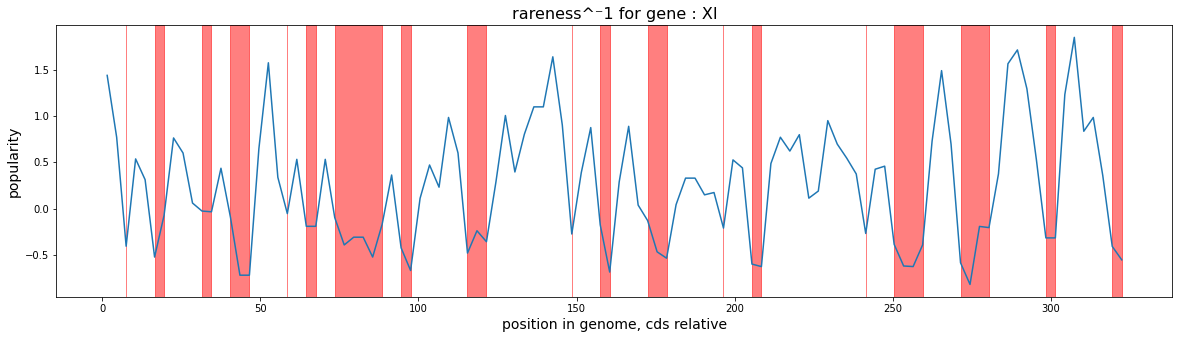

je suis la liste d'avant:  [2, 3, 4, 10, 14, 15, 16, 17, 18, 27, 28, 34, 35, 36, 37, 38, 39, 40, 44, 47, 48, 54, 55, 56, 57, 58, 59, 60, 66, 67, 73, 85, 86, 87, 92, 94, 95, 104, 105, 106, 115, 116, 117, 118, 130, 131, 132, 133, 139, 140, 141, 144, 145, 146, 152, 153, 154, 155, 156, 159, 160, 161, 162, 163, 168, 169, 170, 173, 174, 175, 183, 184, 186, 187, 188, 189, 192, 193, 194, 197, 202, 203, 211, 214, 215, 217, 224, 230, 231, 236, 238, 239, 240, 244, 253, 254, 255, 256, 260, 261, 262, 264, 265, 268, 269, 272, 275, 276, 277, 285, 290, 291, 303, 304, 306, 307, 315, 323, 324, 338, 342, 343, 344, 345, 346, 349, 354, 356, 357, 360, 361, 364, 370, 371, 372, 376, 381, 382, 395, 402, 403, 404, 407, 411, 412, 413, 416, 420, 421]
[(2, 4), (10, 10), (14, 18), (27, 28), (34, 40), (44, 44), (47, 48), (54, 60), (66, 67), (73, 73), (85, 87), (92, 92), (94, 95), (104, 106), (115, 118), (130, 133), (139, 141), (144, 146), (152, 156), (159, 163), (168, 170), (173, 175), (183, 184), (186, 189), (192, 

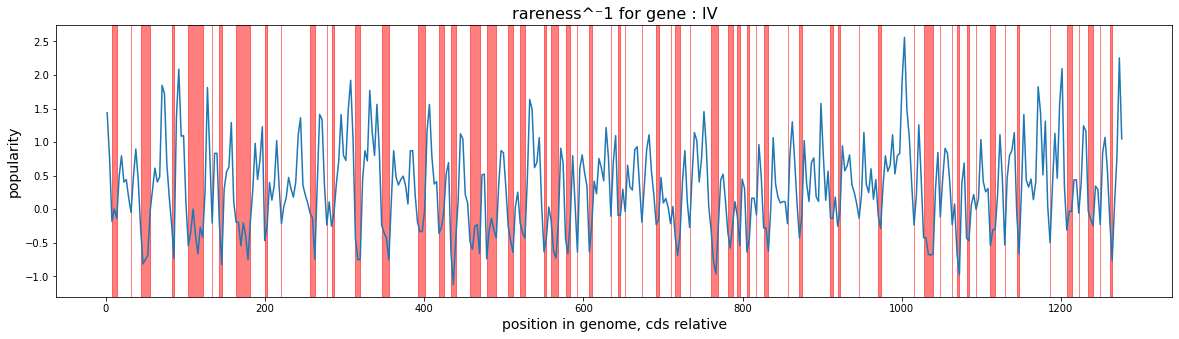

je suis la liste d'avant:  [4, 6, 7, 13, 14, 15, 16, 17, 18, 19, 25, 30, 33, 36, 40, 41, 42, 43, 44, 48, 54, 55, 56, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 77, 85, 86, 87, 90, 91, 92, 93, 94, 97, 101, 106, 109, 110, 111, 112, 113, 115, 116, 117, 118, 122, 123, 124, 125, 130, 135, 136, 139, 145, 146, 150, 153, 154, 161, 162, 163, 164, 165, 166, 169, 172, 173, 174, 180, 181, 182, 183, 187, 188, 189, 190, 191, 192, 196, 199, 201, 204, 208, 209, 210, 211, 212, 213, 214, 219, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 237, 245, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 268, 269, 272, 282, 283, 284, 285, 286, 287, 295, 305, 306, 307, 316, 319, 320, 324, 325, 330, 346, 348, 349, 352, 354, 355, 359, 360, 361, 366, 371, 375, 376, 378, 379, 393, 394, 395, 397, 398, 400, 403, 404, 405, 409]
[(4, 4), (6, 7), (13, 19), (25, 25), (30, 30), (33, 33), (36, 36), (40, 44), (48, 48), (54, 56), (59, 62), (65, 70), (77, 77), (85, 87), (90, 94), (97, 97), (101, 101), (106, 106), (1

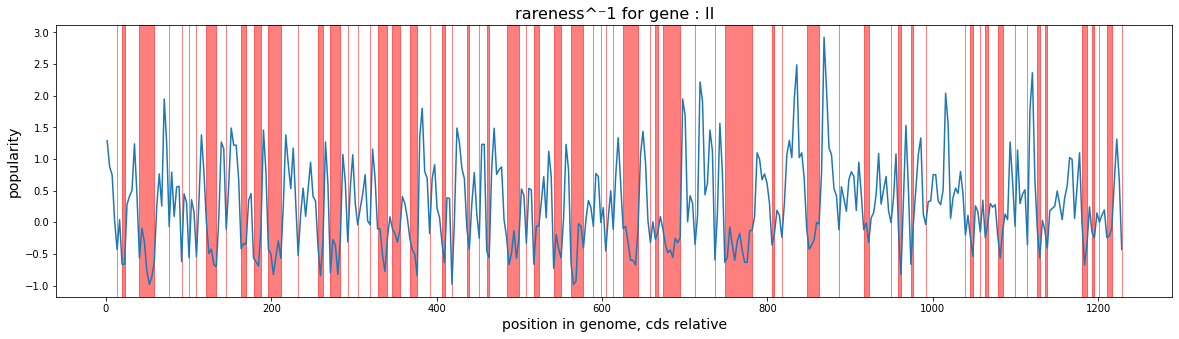

In [6]:
plot_rareness("../ref_files_m13/m13mp18-Kan.ape",1,2,codon_table_ecoli,locations_in_kevin_m13)

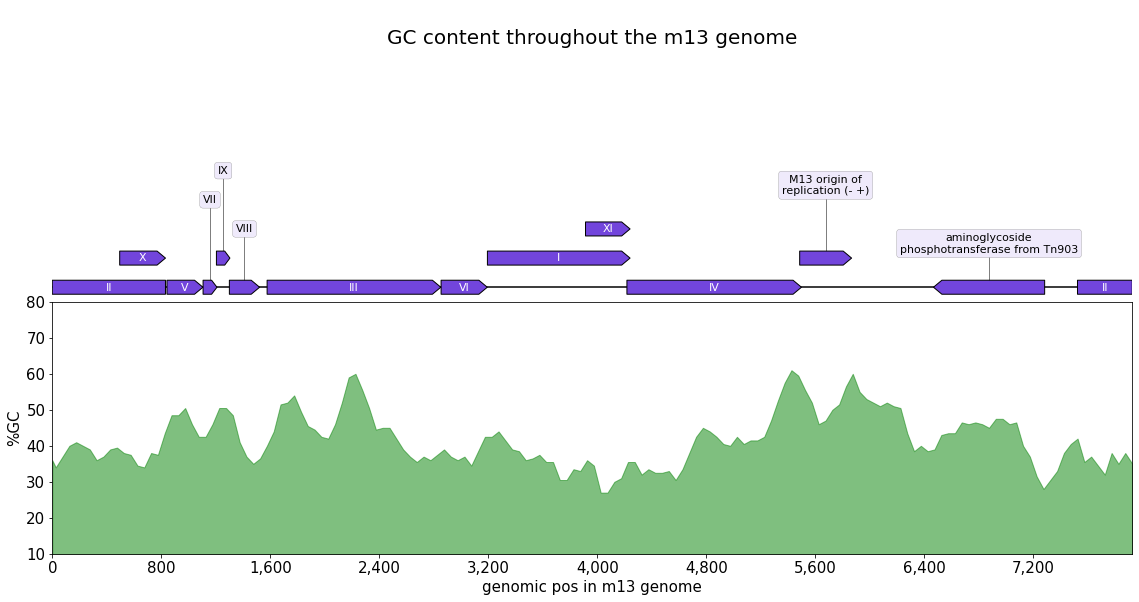

In [7]:
#gc content for genome wide and gene by gene:
#np.asarray(someListOfLists, dtype=np.float32)
import matplotlib.cm as cm
def plot_GC_content(filename,bin_len,step):
    #filename: the specific place where the file is. Must be a genbank file. (or even ape).
    #bin_len: len of bin. getting the mean of GC content in that bin.Should not be 0 !
    #step: step between the bin. The larger the step, the softer the curve (less spikes). Should not be 0.
    #i recommand step < bin_len
    assert bin_len%2==0 , "his values has to be %2 == 0"
    fig, (ax1,ax2) = plt.subplots(
        2, 1, figsize=(15, 7), sharex=True, gridspec_kw={"height_ratios": [10, 10]},
    )
    # PLOT THE RECORD MAP
    record = SeqIO.read(filename, "genbank")
    for feat in record.features:
        if feat.type == "CDS":
            record.features.remove(feat)
        elif "join" in str(feat.location):
            record.features.remove(feat)
            for i in str(feat.location).split(","):
                coor = []
                for j in i.split(":"):
                    j_corrected = re.sub("[^0-9]","",j)
                    coor.append(j_corrected)
                record.features.append(SeqFeature(FeatureLocation(int(coor[0]), int(coor[1])), type=feat.qualifiers["gene"][0],))
        try:
            if "a" in str(feat.qualifiers["gene"][0]):
                record.features.remove(feat)
        except:
            continue
    while len([feat for feat in record.features if "CDS" == feat.type]) != 1:        
        for feat in record.features:
            if "CDS" == feat.type:
                if "Tn903" in str(feat.qualifiers["gene"][0]):
                    continue
                record.features.remove(feat)
    for feat in record.features:
        try:
            if "a" in str(feat.qualifiers["gene"][0]):
                if "Tn903" in str(feat.qualifiers["gene"][0]):
                    continue
                record.features.remove(feat)
        except:
            continue
 
    graphic_record = BiopythonTranslator().translate_record(record)
    graphic_record.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)
    
    #xx is the position at which we would like to have a GC content value. list like object.  
    xx = np.arange(0,len(record.seq)-bin_len,step).tolist()
                    
    #need to modify the axis for plotting gc content in the middle of a bin.
    xaxis = []
    lg_dna=int(len(record.seq))
    for x in xx:
        if x != xx[-1]:
            xaxis.append((x+step+x)/2)
        else:
            xaxis.append((x+step+x)/2)
            for n in range(x+step,lg_dna,step):
                if n < lg_dna-step:
                    xaxis.append((n+step+n)/2)
                    xx.append(n)
                else:
                    xaxis.append(lg_dna)
                    xx.append(n)
            break
    xaxis.insert(0, 0) 
    xx.append(0)
    yy = []
        #yy compute GC% on each bin on length 'bin_len'. The last coor has its own custom bin (and others if x > lg_dna-bin_len), such as 0 coor (with a similar bin content than the last one)
    for j,x in enumerate(xx):
        if x == 0 and j > 1:
            yy.append((GC(record.seq[int(lg_dna-bin_len/2):lg_dna])+GC(record.seq[:int(bin_len/2)]))/2)
            continue
        if x < lg_dna-bin_len:
            yy.append(GC(record.seq[x:x+bin_len]))

        else:
            pond1 = (lg_dna-x)/bin_len
            pond2 = (bin_len-(lg_dna-x))/bin_len
            yy.append(pond1*GC(record.seq[x:lg_dna])+pond2*GC(record.seq[:bin_len-(lg_dna-x)]))
    ax2.fill_between(xaxis, yy, alpha=0.5,color="g") #alpha for % of opacity (transparency^-1)
    ax2.set_ylim(bottom=0)
    
    extent = [0, max(xaxis) , 0,1] #coordinates for the secondary axis S
    # choose a color present in https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    #yy=np.asarray(yy)
    #ax1.imshow(yy[np.newaxis,:], cmap="inferno", aspect="auto", extent=extent)
    #ax1.set_yticks([])
    ax1.set_xlim(extent[0], extent[1])
    ax2.set_ylim(10,80)
    ax2.set_ylabel("%GC", fontsize = 15)
    ax2.set_xlabel("genomic pos in m13 genome", fontsize = 15)
    ax1.set_visible(True)
    ax1.set_title("\n"+'GC content throughout the m13 genome', fontsize = 20)
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=15)
    fig.set_facecolor("w")
    plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1, 
                    top=1, 
                    wspace=0, 
                    hspace=0)
    plt.show()
    
#     return xaxis, yy
plot_GC_content("../ref_files_m13/m13mp18-Kan.ape",200,50)
